## K-Means
* Common clustering technique, helps to solve many problems efficiently.
* K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
X, _ = make_blobs(1000, centers=5, random_state=42)

In [5]:
class KMeans:
    
    def __init__(self, n_clusters, max_iter=10):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        jobs = []
        for i in range(10):
            center_points = random.choices(X, k=self.n_clusters)
            clusters = []
            for point in center_points:
                cluster = Cluster(point)
                clusters.append(cluster)

            for i in range(self.max_iter):
                labels_ = []
                for point in X:
                    distances = []
                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append((dis, cluster))

                    distances_np = np.array(distances)
                    min_index = np.argmin(distances_np[:, 0])

                    selected = clusters[min_index]
                    selected.points.append(point)
                    labels_.append(min_index)

                for cluster in clusters:
                    cluster.update_center()
        
            current_error = self.error(clusters, X, labels_)
            jobs.append((current_error, clusters, labels_))
        jobs = np.array(jobs)
        min_index = np.argmin(jobs[:, 0])
        best_job = jobs[min_index]
        self.clusters = best_job[1]
        self.labels_ = best_job[2]
        
    def error(self, clusters, X, labels_):
        total = 0
        for point, index in zip(X, labels_):
            total += clusters[index].distance(point)
        return total
            
        
class Cluster:
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def update_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
    
    def distance(self, point):
        return np.sum((self.center - point) ** 2)

In [6]:
model = KMeans(5)

In [7]:
model.fit(X)

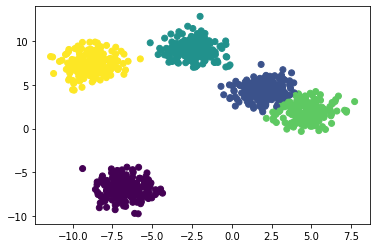

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)


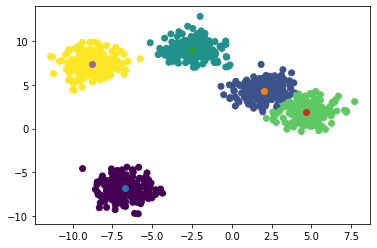

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for cluster in model.clusters:
    plt.scatter(cluster.center[0], cluster.center[1] )

## Another way ONLINE LEC K-MEANS CLUSTERING

In [9]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

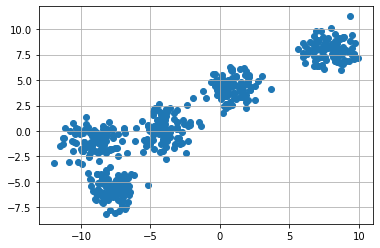

In [10]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [11]:
k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster

In [12]:
#clusters

In [13]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [14]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

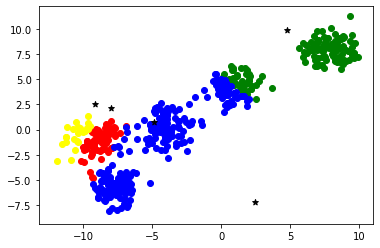

In [15]:
assignPointToClusters(clusters)
plotClusters(clusters)

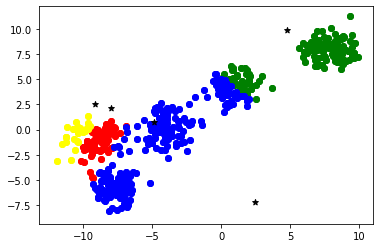

In [16]:
# Repeat this cell few times or put it inside a loop
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)